## Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt

### Загрузим данные

In [2]:
visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),
    pd.read_csv('orders_info_short.csv'),
    pd.read_csv('costs_info_short.csv')
)
visits.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [4]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### Предобработка данных

В выгружаемых данных видим, что столбцы содержащие дату/время находятся в непонятном для Pythona формате. Также необходимо поправить наименование столбцов для удобной работы

In [5]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
#visits = visits.rename(columns={'User Id': 'user_id', 'Session Start': 'session_start', 'Session End': 'session_end'})
#visits.columns = [x.lower() for x in visits.columns]
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()
visits.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,region,device,channel,session_start,session_end
109630,605765819860,United States,iPhone,FaceBoom,2019-08-15 02:58:26,2019-08-15 03:36:34
98640,881827670089,United States,Mac,organic,2019-08-06 05:36:52,2019-08-06 06:09:21
238197,347688650762,Germany,iPhone,LeapBob,2019-07-02 03:59:44,2019-07-02 04:38:20
145105,793250895967,United States,iPhone,RocketSuperAds,2019-09-15 22:22:19,2019-09-16 00:08:57
292718,417149499743,Germany,PC,WahooNetBanner,2019-10-03 07:57:09,2019-10-03 08:35:29


In [6]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
#orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'})
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()
orders.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,user_id,event_dt,revenue
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


In [7]:
costs.columns = [x.lower() for x in costs.columns]
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 
#costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")
costs.info()
costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


#### Таблица visits

Проверим данные в таблицах на корректность

In [8]:
visits['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
214203066007     1
369265191867     1
346271445800     1
133742530598     1
279181973476     1
Name: user_id, Length: 150008, dtype: int64

Количество уникальных пользователей - 150008

In [9]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

2/3 всех пользователей из США. Великобритания, Франция и германия представлена 1/3 выборки


In [10]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

Среди данных об устройствах представлены iPhone, Android, PC, Mac. Больше всего в логах пользователей iPhone - 112603

In [11]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Из 309901 пользователей, 107760 человек (более 34%) пришли в развлекательное приложение Procrastinate Pro+ самостоятельно, не через рекламные каналы.

Проверим на наличие дубликатов:

In [12]:
visits[visits.duplicated()]

,user_id,region,device,channel,session_start,session_end


Дубликатов в таблице visits не обнаружено

#### Таблица orders

In [13]:
orders['user_id'].value_counts()

901180916748    22
883098437811    20
75337957494     19
512471511263    19
295795879965    19
                ..
829252887757     1
499471996783     1
847348136580     1
390188868722     1
168548862926     1
Name: user_id, Length: 8881, dtype: int64

Количество уникальных пользователей, совершивших заказы - 8881. Самый часто заказывающий пользователь - с id 901180916748 

In [14]:
orders['event_dt'].value_counts()

2019-10-26 06:49:22    2
2019-06-27 06:09:53    2
2019-09-14 23:35:11    2
2019-10-05 08:23:22    2
2019-10-11 20:55:22    2
                      ..
2019-08-20 02:51:09    1
2019-08-20 06:58:44    1
2019-08-20 14:41:23    1
2019-08-20 18:09:32    1
2019-10-31 13:29:06    1
Name: event_dt, Length: 40163, dtype: int64

Из 40212 заказов, 40163 уникальных пользователей, то есть повторных покупателей всего 49 человек

In [15]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

Количество заказов - 40212. Средний чек заказа составляет 5,37 у.е. Минимальная стоимость заказа, а также размер 1, 2 и 3 квантилей равны между собой. Возможно 4,99 - стоимость подписки развлекательного приложения Procrastinate Pro+.

Проверим на наличие дубликатов:

In [16]:
orders[orders.duplicated()]

,user_id,event_dt,revenue


Дубликатов в таблице orders не обнаружено

#### Таблица costs

In [17]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

В выгрузке представлены данные по закупкам в 10 рекламных источниках - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit', 'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner', 'lambdaMediaAds'

In [18]:
costs['dt'].value_counts().sort_values()

2019-05-01    10
2019-05-11    10
2019-05-03    10
2019-05-04    10
2019-05-05    10
              ..
2019-10-22    10
2019-10-23    10
2019-10-24    10
2019-10-26    10
2019-10-27    10
Name: dt, Length: 180, dtype: int64

180 уникальных дат. Расходы на рекламу представлены за 180 дней

In [19]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Средние и медианные затраты на маркетинг сильно отличаются (58.6 и 12.2 соответственно) - возможно, что на какие-то рекламные источники уходит больше затрат. Максимальные затраты на рекламу 630 у.е., минимальные - 0.8.

Проверим на наличие дубликатов:

In [20]:
costs[costs.duplicated()]

,dt,channel,costs


Дубликатов в таблице costs не обнаружено

### Выводы по Шагу № 1

Количество уникальных пользователей - 150008 человек. 2/3 всех пользователей из США. Великобритания, Франция и германия представлена 1/3 выборки. Среди данных об устройствах представлены iPhone, Android, PC, Mac. Больше всего пользователей iPhone - 112603. Из 309901 пользователей, 107760 человек (более 34%) пришли в развлекательное приложение Procrastinate Pro+ самостоятельно, не через рекламные каналы.

Количество уникальных пользователей, совершивших заказы - 8881. Самый часто заказывающий пользователь - с id 901180916748. Из 40212 заказов, 40163 уникальных пользователей, то есть повторных покупателей всего 49 человек. Средний чек заказа составляет 5,37 у.е. Минимальная стоимость заказа, а также размер 1, 2 и 3 квантилей равны между собой. Возможно 4,99 - стоимость подписки развлекательного приложения Procrastinate Pro+.

Затраты на рекламу представлены 1800 позициями - за 180 дней по 10 рекламным источникам - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit', 'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner', 'lambdaMediaAds'. Максимальные затраты на рекламу 630 у.е., минимальные - 0.8.

In [21]:
def inspect(df):
    display(df.head()) 
    df.info() 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    return df

costs = inspect(costs)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
Количество дубликатов - 0


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

**************************************************


## Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

### Зададим функцию для расчёта LTV и ROI

Момент анализа у нас 01.11.2019, а горизонт анализа - 14 дней. 

In [22]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 


In [23]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 


### Зададим функцию для расчёта удержания

In [24]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


### Зададим функцию для расчёта конверсии

In [25]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


### Зададим также  функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 


In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


## Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Построим профили пользователей

In [30]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

       # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs['dt'] = pd.to_datetime(costs['dt']).dt.date
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [31]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Из расчетов нам следует исключить пользователей с органическим трафиком, поскольку мы за них ничего не платим.


In [32]:
profiles = profiles.query('channel != "organic"')

Определим минимальную и максимальную дату привлечения пользователей

In [33]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()
min_analysis_date

datetime.date(2019, 5, 1)

In [34]:
observation_date

datetime.date(2019, 10, 27)

Минимальная дата привлечения пользователей - 1 мая 2019 года. Максимальная дата привлечения пользователей - 27 октября 2019 года, что соответствует техническому заданию проекта

### Составим таблицу распределения пользователей по странам с учетом процента платящих пользователей

In [35]:
region_share = pd.DataFrame()
region_share['users'] = profiles.groupby('region')['user_id'].count()
region_share['share'] = ((region_share['users'] / profiles['region'].count()) * 100)
region_share['share_payer'] = ((profiles.query('payer == True').groupby('region')['user_id'].count() / profiles.query('payer == True')['region'].count()) * 100)
region_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'share_payer': '{:.2f}%'})


,users,share,share_payer
region,,,
United States,61829,66.08%,79.11%
UK,11154,11.92%,7.37%
France,11058,11.82%,7.18%
Germany,9528,10.18%,6.35%


Судя по результатам, 66,1% пользователей представлены Соединенными Штатами Америки, Великобритания и Франция по 11,9% и 11,8 % соответственно и 10,2% - пользователи из Германии.
При этом процент платящих пользователей распределяется в том же порядке, но с немного другими процентами - 79,1% США, 7,4% Великобритания, Франция 7,2 %, Германия - 6,3 %.

#### Рассчитаем долю платящих пользователей по странам

In [36]:
def pivot_region(column, df):
    upshot = pd.DataFrame()
    upshot['users'] = df.groupby(column)['user_id'].count()
    upshot['users_share'] = ((upshot['users'] / df[column].count()) * 100)
    upshot['payer_users'] = df.query('payer == True').groupby(column)['user_id'].count()
    upshot['payer_share'] = ((upshot['payer_users'] / upshot['users']) * 100)
    return upshot.sort_values(by='users_share', ascending=False).style.format({'users_share': '{:.2f}%', 'payer_share': '{:.2f}%'})

In [37]:
pivot_region('region', profiles)

,users,users_share,payer_users,payer_share
region,,,,
United States,61829,66.08%,6108,9.88%
UK,11154,11.92%,569,5.10%
France,11058,11.82%,554,5.01%
Germany,9528,10.18%,490,5.14%


Доля платящих, пришедших из каждой страны выглядит следующим образом. Около 10% - пользователи США, по 5% - пользователи из Великобритании, Франции и Германии

#### Выясним какими устройствами пользуются платящие  пользователи

Для начала выясним какими устройствами пользуются все пользователи

In [38]:
device_share = pd.DataFrame()
device_share['users'] = profiles.groupby('device')['user_id'].count()
device_share['share_device'] = ((device_share['users'] / profiles['device'].count()) * 100)
device_share.sort_values(by='share_device', ascending=False).style.format({'share_device': '{:.2f}%'})


,users,share_device
device,,
iPhone,33882,36.21%
Android,21841,23.34%
PC,19153,20.47%
Mac,18693,19.98%


Пользователи приложения в большинстве своем пользуются iPhone и Android (36,2 и 23,3% соответственно). Доля РС и Мас примерно одинакова и составляет около 20%

#### Выделим из этого количества пользователей только платящих.

In [39]:
device_payer = pd.DataFrame()
device_payer['users'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer['share'] = ((device_payer['users'] / profiles.query('payer == True')['device'].count()) * 100)
device_payer.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})


,users,share
device,,
iPhone,2972,38.49%
Android,1782,23.08%
Mac,1673,21.67%
PC,1294,16.76%


Ситуация вырисовывается аналогичная. На первом месте - владельцы iPhone с 38,5% платящих пользователей, на 2 месте - Android с 23,1% платящих пользователей. Мас вырвался на 3 место - с 21,7 %. Замыкает четверку пользователи РС - с 16,7% платящими пользователями.

### По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [40]:
channel_share = pd.DataFrame()
channel_share['users'] = profiles.groupby('channel')['user_id'].count()
channel_share['share'] = ((channel_share['users'] / profiles['channel'].count()) * 100)

channel_share['payer_users'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_share['payer_share'] = ((channel_share['payer_users'] / profiles.query('payer == True')['channel'].count()) * 100)

channel_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,users,share,payer_users,payer_share
channel,,,,
FaceBoom,29144,31.15%,3557,46.07%
TipTop,19561,20.91%,1878,24.32%
OppleCreativeMedia,8605,9.20%,233,3.02%
LeapBob,8553,9.14%,262,3.39%
WahooNetBanner,8553,9.14%,453,5.87%
RocketSuperAds,4448,4.75%,352,4.56%
MediaTornado,4364,4.66%,156,2.02%
YRabbit,4312,4.61%,165,2.14%
AdNonSense,3880,4.15%,440,5.70%


Проанализировав полученную таблицу, можно сделать вывод, что 37,6% пользователей - это органический трафик. По-хорошему, если мы анализируем привлечение клиентов по рекламным каналам, органических клиентов нужно исключить из выборки для более удобного анализа. Хотя и из них - 13% пользователей стали платящими. Неплохой показатель по сравнению с прочими рекламными каналами.

Больше всего пользователей привлеклось из рекламного канала FaceBoom (19,4%) и TipTop (13,0%). Из этих же каналов больше всего пользователей сконвертировались в платящих (40% и 21% соответственно).

Менее всего популярен среди всех пользователей рекламный канал lambdaMediaAds (1,4%). Меньше всего конвертируются в платящих пользователей клиенты из рекламного канала MediaTornado (1,76%).



### Выводы по Шагу № 3

Судя по результатам, 66,1% пользователей представлены Соединенными Штатами Америки, Великобритания и Франция по 11,9% и 11,8 % соответственно и 10,2% - пользователи из Германии. При этом процент платящих пользователей распределяется в том же порядке, но с немного другими процентами - 79,1% США, 7,4% Великобритания, Франция 7,2 %, Германия - 6,3 %.

Доля платящих, пришедших из каждой страны выглядит следующим образом. Около 10% - пользователи США, по 5% - пользователи из Великобритании, Франции и Германии

Пользователи приложения в большинстве своем пользуются iPhone и Android (36,2 и 23,3% соответственно). Доля РС и Мас примерно одинакова и составляет около 20%

Ситуация вырисовывается аналогичная. На первом месте - владельцы iPhone с 38,5% платящих пользователей, на 2 месте - Android с 23,1% платящих пользователей. Мас вырвался на 3 место - с 21,7 %. Замыкает четверку пользователи РС - с 16,7% платящими пользователями.

Больше всего пользователей привлеклось из рекламного канала FaceBoom (31,15%) и TipTop (20,9%). Из этих же каналов больше всего пользователей сконвертировались в платящих (46% и 24% соответственно).

Менее всего популярен среди всех пользователей рекламный канал lambdaMediaAds (2,3%). Меньше всего конвертируются в платящих пользователей клиенты из рекламного канала MediaTornado (2,02%).

## Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Выясним сколько всего денег потратили на рекламу

In [41]:
costs['costs'].sum()

105497.30000000002

Всего на рекламу потратили 105497,3 у.е.

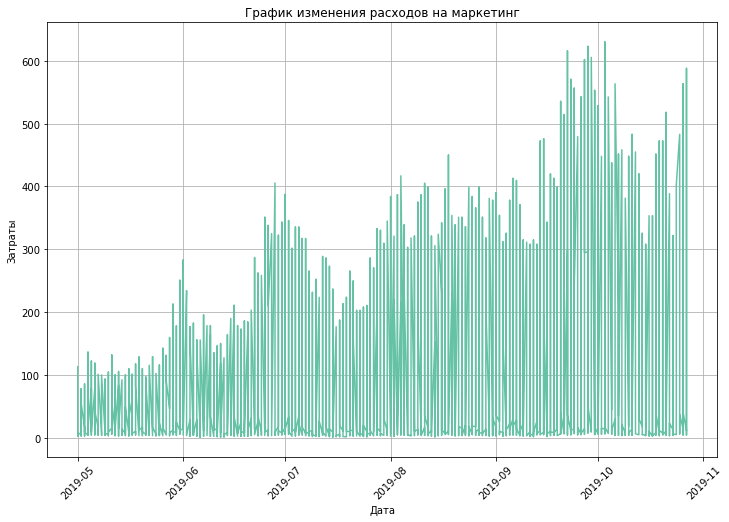

In [42]:
costs.plot(y='costs', # столбец значений для вертикальной оси,
           x='dt',
           figsize=(12, 8), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Расходы на маркетинг', # название линии                       
           legend=False, # выводить ли легенду к графику
           colormap='Set2') 

plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()


К пятому месяцу - октябрю 2019 года расходы на рекламу увеличились до 630 у.е., затем снизились до 300 у.е. и к ноябрю 2019 опять увеличились до 600 у.е

#### Посмотрим как распределены затраты на маркетинг по источникам

In [43]:
channel_costs = pd.DataFrame()
channel_costs['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs['share'] = ((channel_costs['costs'] / costs['costs'].sum()) * 100)
channel_costs.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})


,costs,share
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


Больше всего рекламных средств вкладывается в каналы TipTop и FaceBoom (51,9% и 30,8% соответственно). На рекламный источник WahooNetBanner потрачено 4,88% средств, на AdNonSense - 3,71% средств. На остальные рекламные источники тратится по 1-2% рекламного бюджета

#### Выведем на графике как распределы рекламные затраты во времени

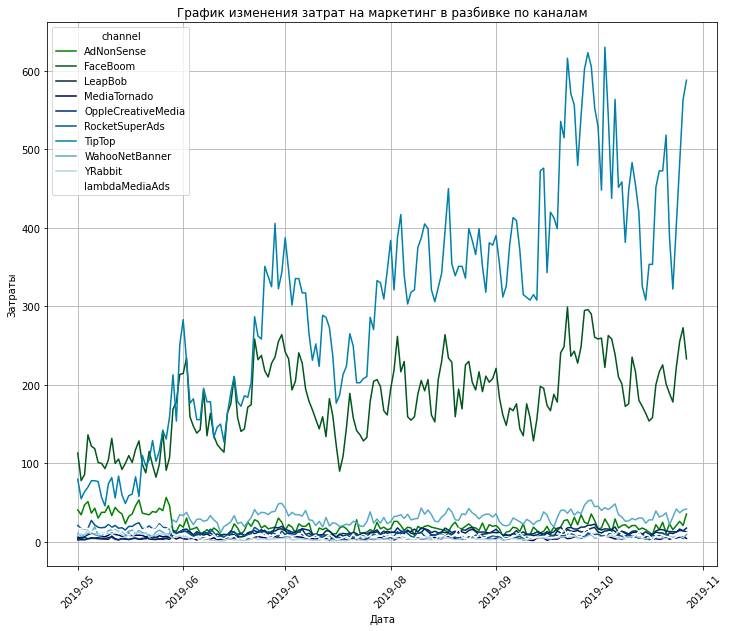

In [44]:
filtered_data = costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
           colormap='ocean'
) 

plt.title('График изменения затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()


#### Уберем два крупнейших рекламных канала, чтобы проанализировать остальные

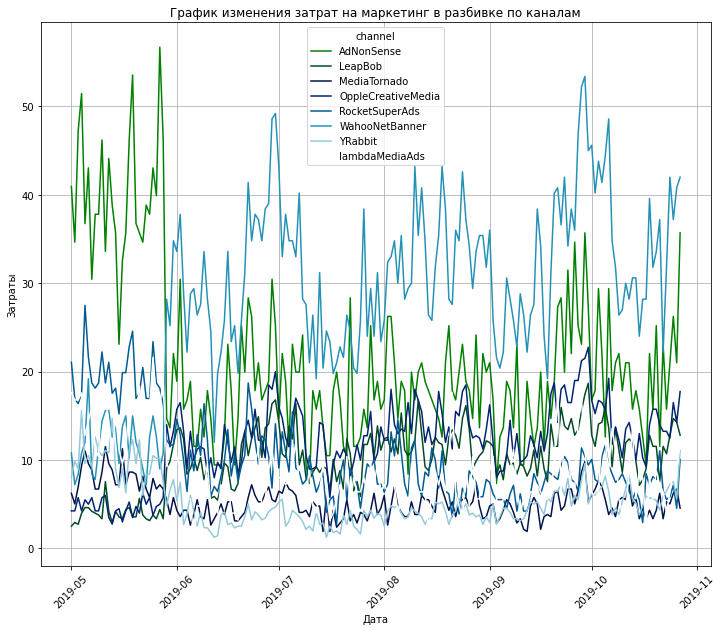

In [45]:
filtered_data2 = costs.query('channel != "TipTop" and channel != "FaceBoom"').pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data2.plot(                                             
           figsize=(12, 10), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
           colormap="ocean"
) 

plt.title('График изменения затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Очень резкие амплитудные скачки на графике, в месяц около 8-10 скачков. Можно предположить, что рекламу оплачивали раз в 3-5 дней. На этом графике самые популярные рекламные каналы - это WahooNetBanner и AdNonSense с затратами 20-50 у.е. в день	

### Выясним сколько стоит привлечение одного покупателя из каждого источника

In [46]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000


Стоимость привлечения одного пользователя отражена в столбце acquisition_cost. Рассмотрим этот столбец более детально

In [47]:
profiles.describe()

,user_id,acquisition_cost
count,9.356900e+04,93569.000000
mean,4.995116e+11,1.127481
std,2.881600e+11,0.990503
min,5.993260e+05,0.124615
25%,2.506301e+11,0.257143
50%,4.972331e+11,1.080531
75%,7.490889e+11,1.128571
max,9.999799e+11,3.715385


Средняя стоимость привлечения одного пользователя - 0.7 у.е. При этом медиана составляет 0.24 у.е. Очень сильный разброс между показателями, поэтому ориетируемся на показатель медина - 0.24 у.е.

#### Выведем сводную таблицу с медианной стоимостью привлечения пользователей в разрезе рекламных компаний

In [48]:
profiles_acquisition_cost = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
profiles_acquisition_cost

,acquisition_cost
channel,
AdNonSense,1.008054
FaceBoom,1.113286
LeapBob,0.210172
MediaTornado,0.218717
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
TipTop,2.799003
WahooNetBanner,0.602245
YRabbit,0.218975


#### Визуализируем получившиеся результаты

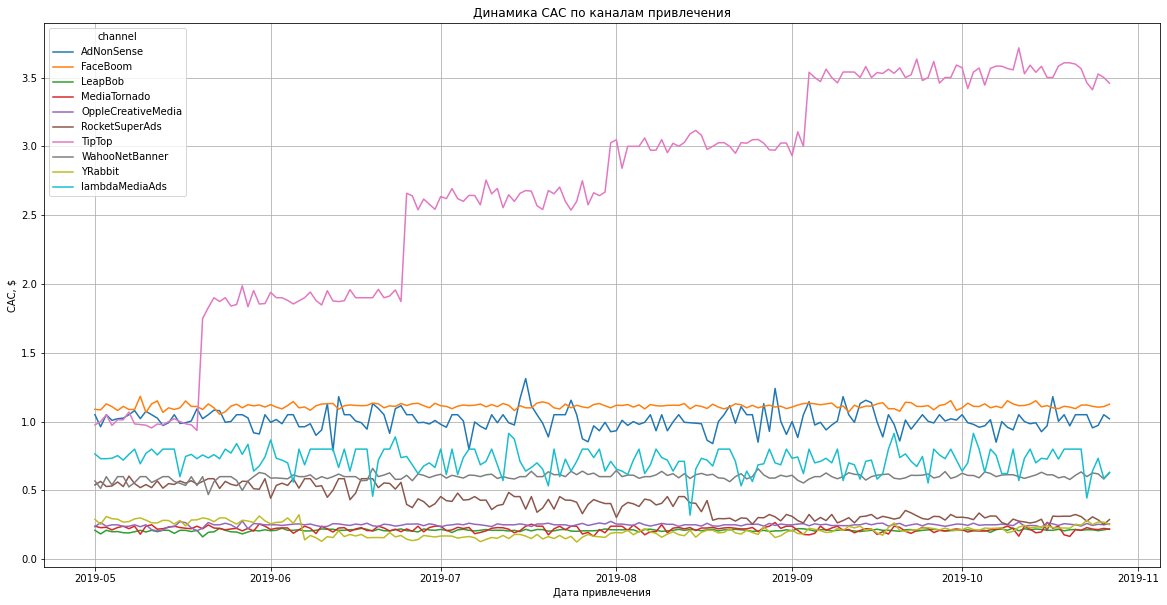

In [49]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(20, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()


Привлечение одного пользователя из рекламной сети Tiptop обошлось компании в среднем в 2,8 у.е., из FaceBoom, AdNonSense — в среднем 1 у.е., а из сетей LeapBob, MediaTornado, OppleCreativeMedia, YRabbit - около 0,2 у.е.

### Выводы по шагу № 4

Всего на рекламу потратили 105497,3 у.е. Больше всего рекламных средств вкладывается в каналы TipTop и FaceBoom (51,9% и 30,8% соответственно). На рекламный источник WahooNetBanner потрачено 4,88% средств, на AdNonSense - 3,71% средств. На остальные рекламные источники тратится по 1-2% рекламного бюджета. Популярные рекламные каналы помимо двух крупных - это WahooNetBanner и AdNonSense с затратами 20-50 у.е. в день.

Средняя стоимость привлечения одного пользователя - 0.7 у.е. При этом медиана составляет 0.24 у.е. Очень сильный разброс между показателями, поэтому ориетируемся на показатель медина - 0.24 у.е. Привлечение одного пользователя из рекламной сети Tiptop обошлось компании в среднем в 2,8 у.е., из FaceBoom, AdNonSense — в среднем 1 у.е., а из сетей LeapBob, MediaTornado, OppleCreativeMedia, YRabbit - около 0,2 у.е.

## Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируем общую окупаемость рекламы

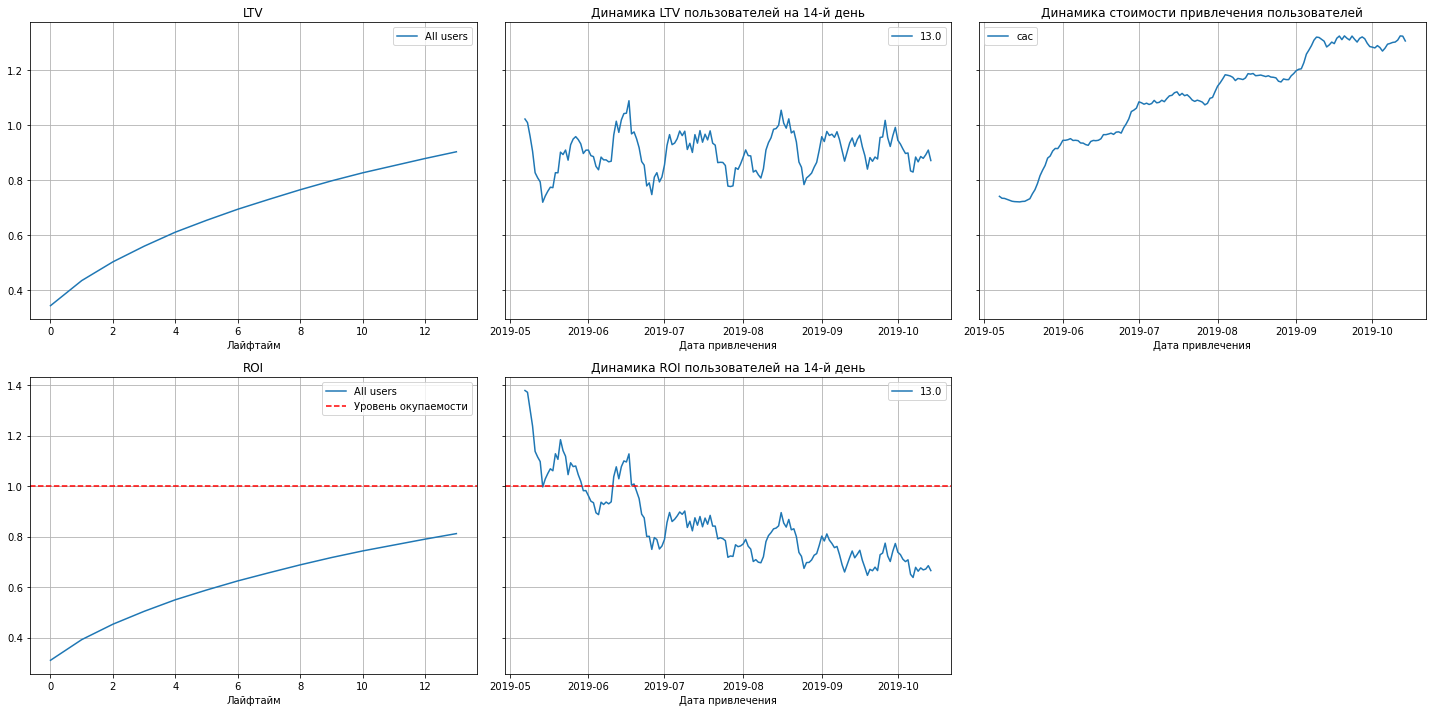

In [50]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Судя по графикам LTV и ROI, средняя накопительная выручка ожидаемо растет. 
Стоимость привлечения пользователей постоянно увеличивается. 
Реклама к концу второй недели не окупается, ROI составляет 80%.
Динамика ROI пользователей к 14 дню падает

### Проанализируем окупаемость рекламы с разбивкой по устройствам

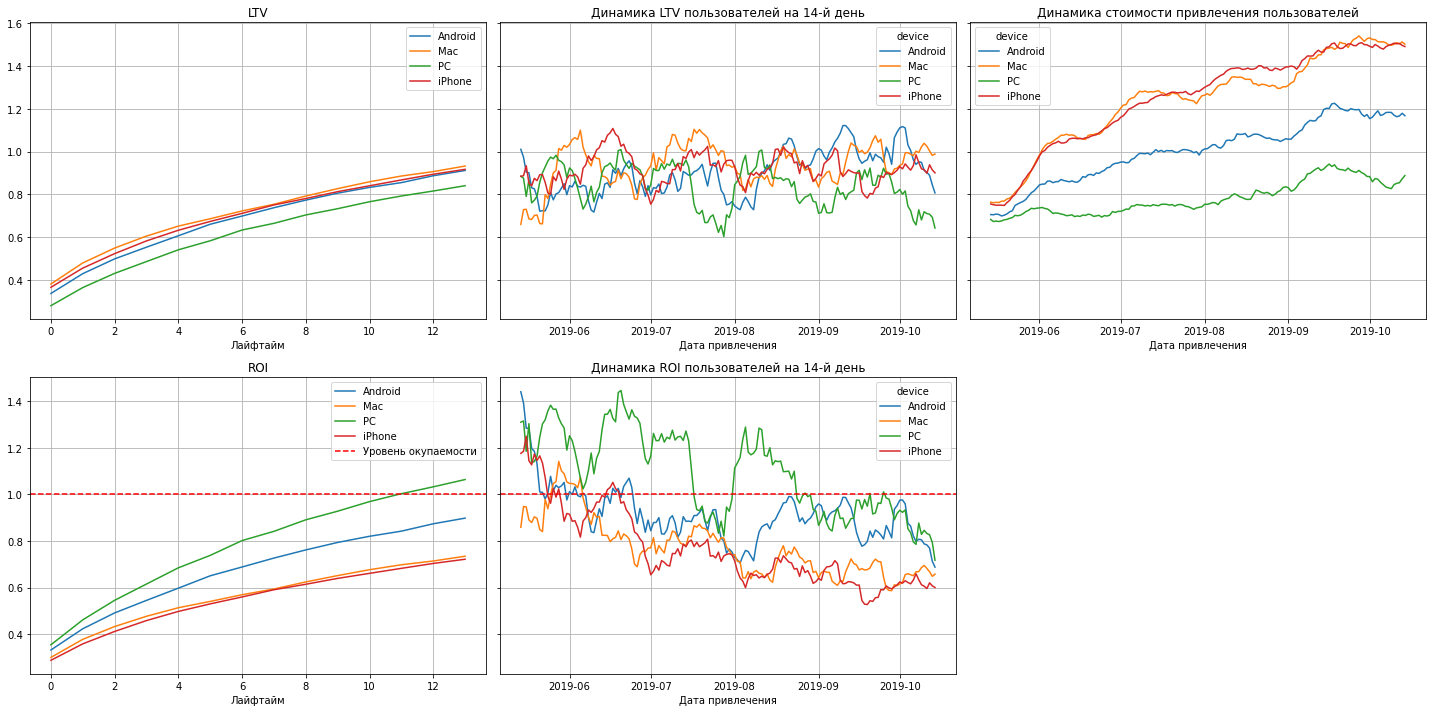

In [51]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Рекламными компаниями сделана ставка на привлечение пользователей iPhone и MAC, которые приносят слишком мало выручки. В июле в точке окупаемости были пользователи со всех устройств, а далее владельцы iPhone и Mac перестали приносить прибыль на прежнем уровне. При этом стоимость привлечения пользователей продолжала расти

Узнаем, в чём причина: в низкой конверсии или низком удержании.
Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().


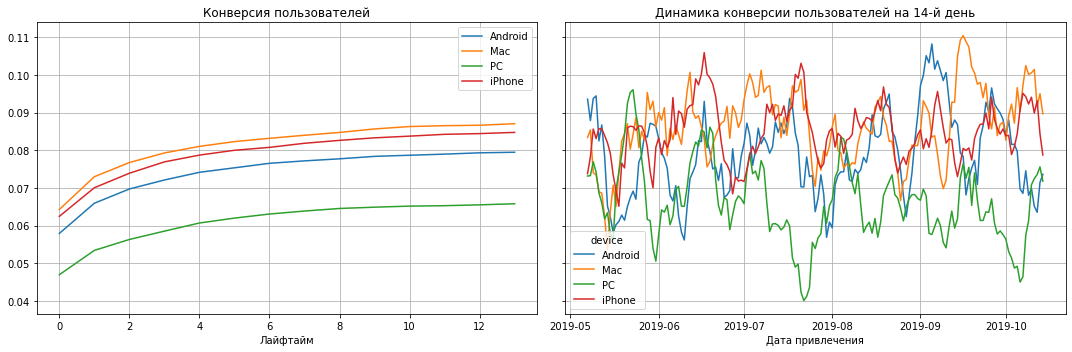

In [52]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи iPhone и Mac конвертируются хорошо. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

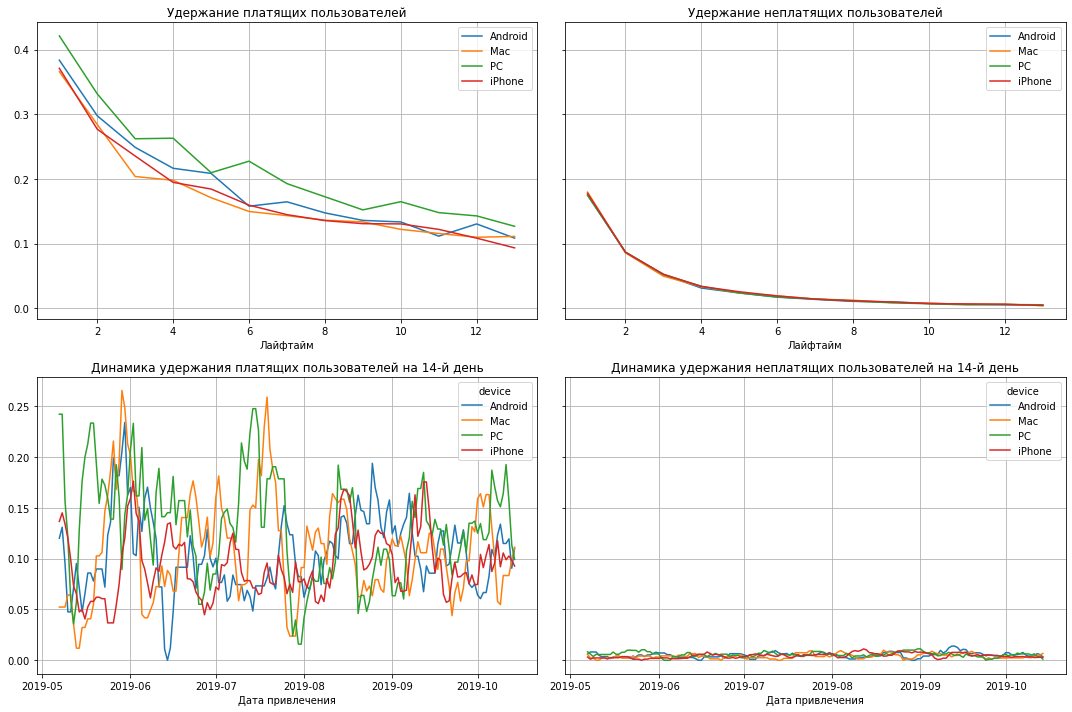

In [53]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи устройств удерживаются примерно одинаково. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

### Проанализируем окупаемость рекламы с разбивкой по странам

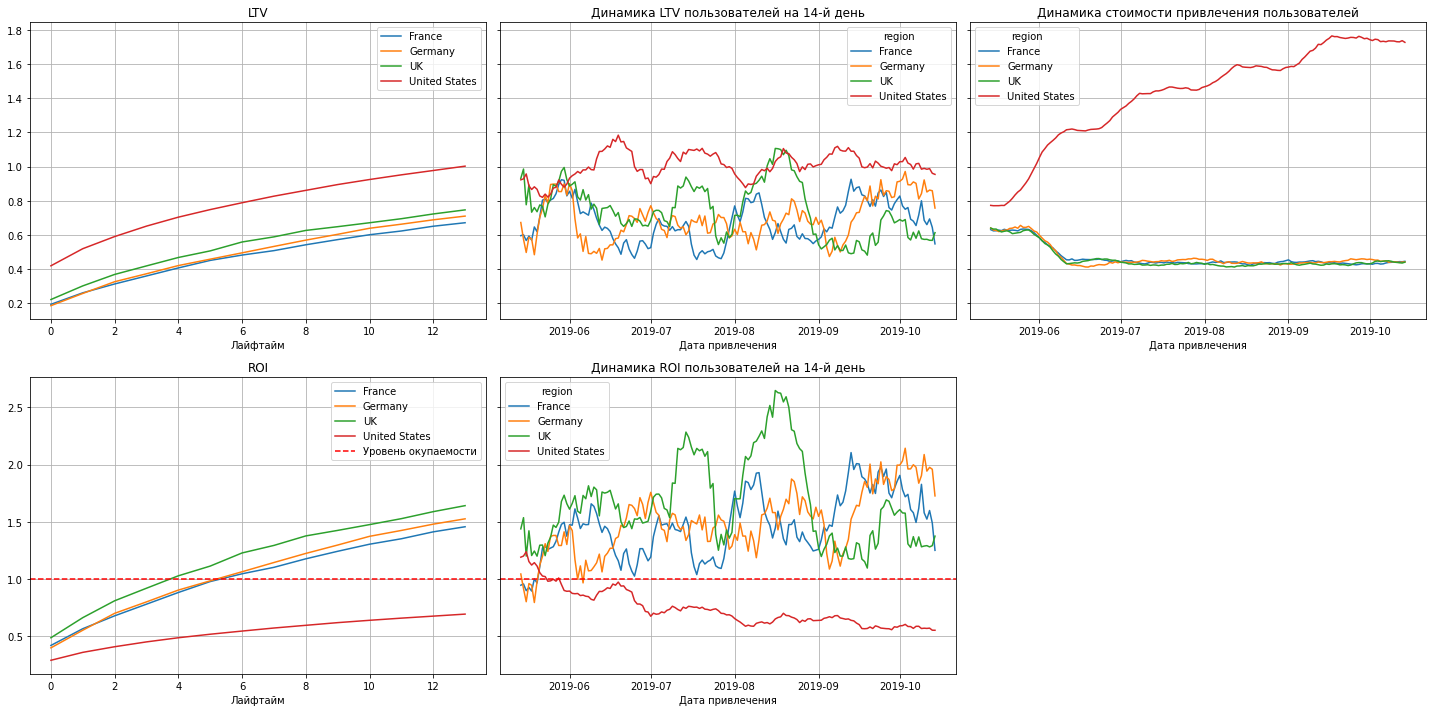

In [54]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

С июня произошел резкий рост стоимости привлечения пользователей из США, при этом окупаемость данных пользователей крайне мала. С середины июня что то пошло не так и окупаемость начала снижаться. Лучше всего окупаются пользователи из Великобритании и Германии. Так как 2/3 пользователей у нас из США - поэтому общая картина кажется печальной

Самые ценные клиенты - из США. Их LTV и удержание максимально. Клиенты из других стран попеременно лидируют / сдают позиции. НО из за огромных расходов на привлечение клиентов из США, их окупаемость стремится к нулю. Лучше всего удерживаются клиенты из Великобритании, так как затраты на их привлечение небольшие.

#### Проанализируем конверсию пользователей с разбивкой по странам

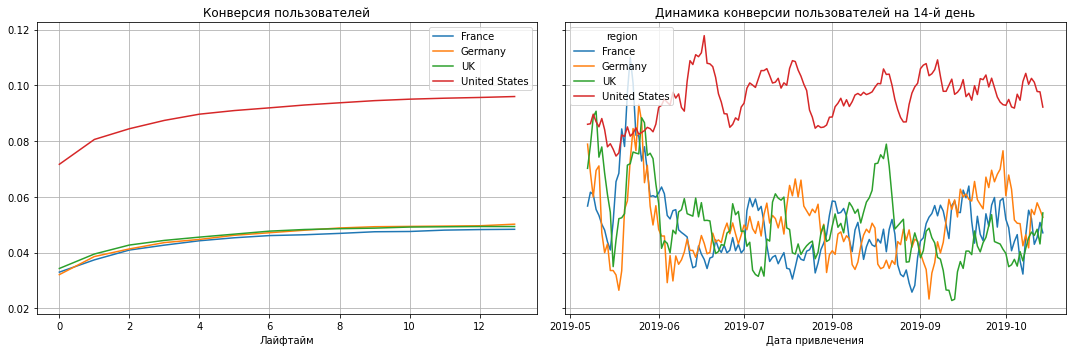

In [55]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей США максимальна. На графике динамики конверсии также лидирует США. Остальные страны держатся на одном уровне

#### Проанализируем удержание пользователей с разбивкой по странам

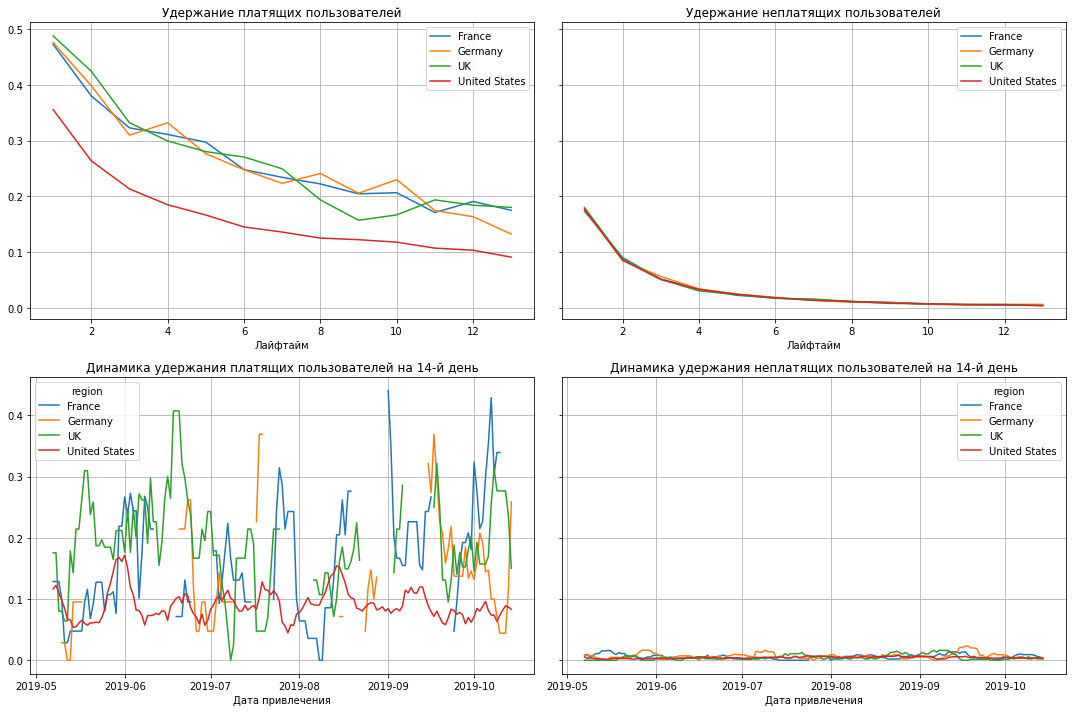

In [56]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 


С удержанием все с точностью да наоборот. Хуже всего удерживаются пользователи из США

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

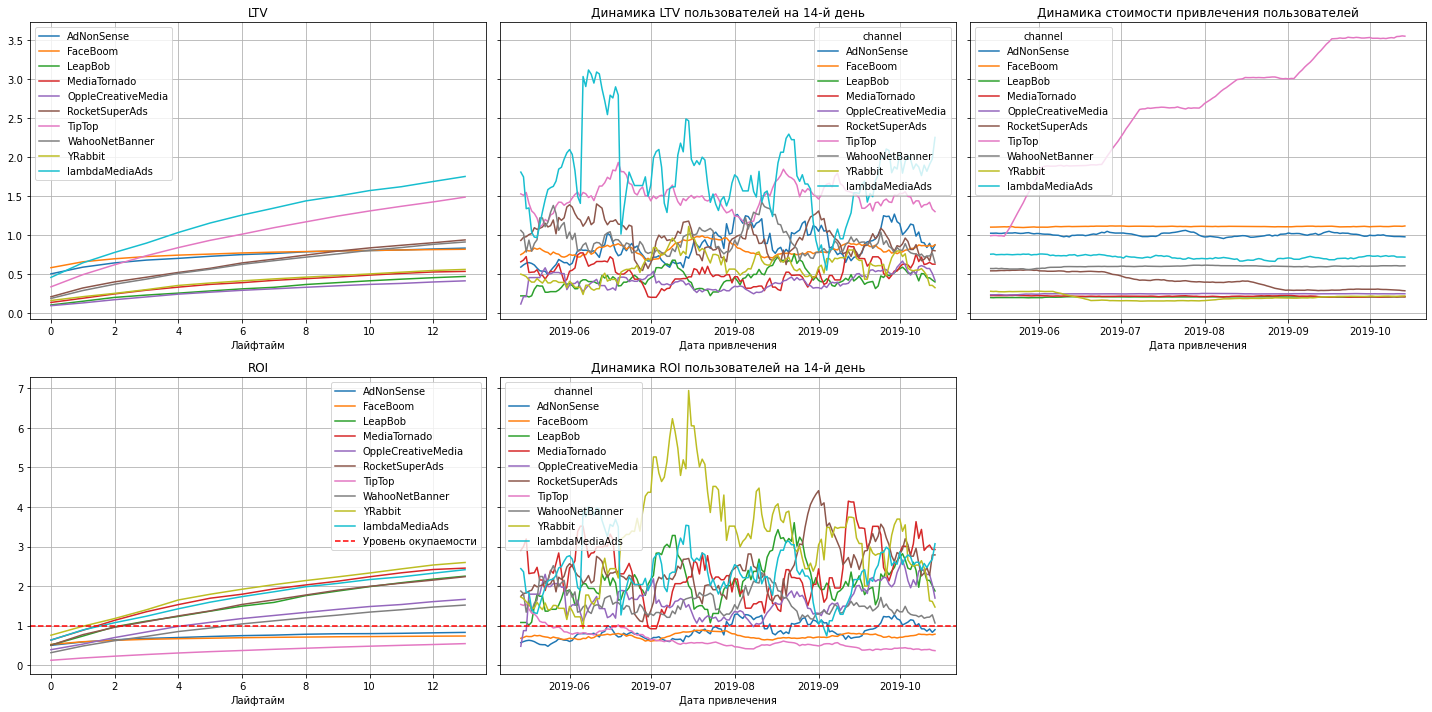

In [57]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Самый дорогой рекламный канал для привлечения пользователей - TipTop. При этом пользователи с этого канала не окупаются. Также не окупаются пользователи с рекламных каналов AdNonSense и FaceBoom.

В июле хорошо себя показала окупаемость с рекламного канала YRabbit

Пользователи, пришедшие с рекламных каналов lambdaMediaAds и TipTop имеют наибольшую ценность и хорошо удерживаются. Стоимость затрат на привлечение клиентов с канала TipTop неоправданно завышены, и в итоге такие пользователи ожидаемо не окупаются

#### Проанализируем конверсию пользователей с разбивкой по рекламным каналам

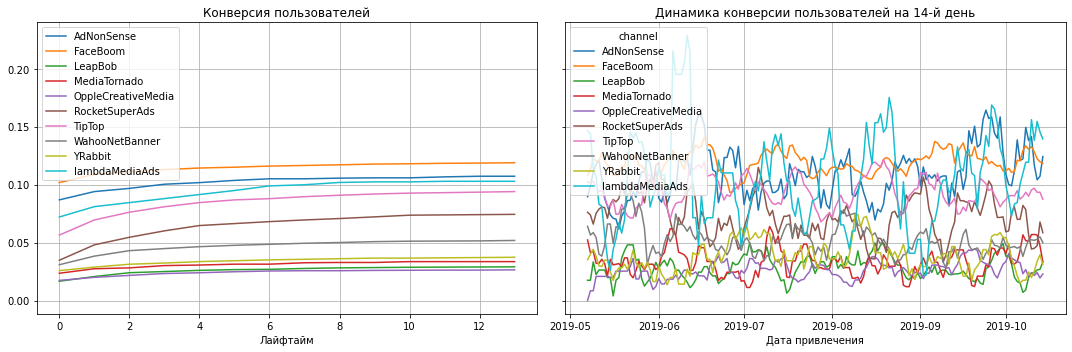

In [58]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


В конверсии по каналам тройка лидируют FaceBoom, AdNonSense

#### Проанализируем удержание пользователей с разбивкой по рекламным каналам

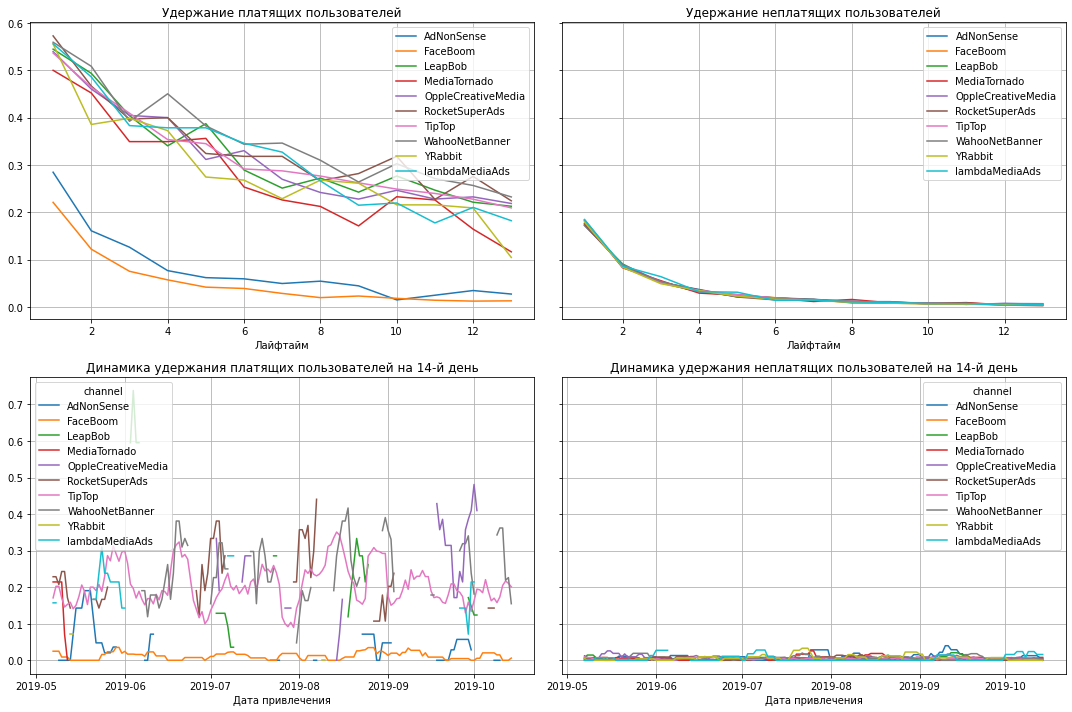

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 


Лидирующие по конверсии рекламные каналы хуже всего удерживаются, кривая по платящим пользователям аналогична графику неплатящих пользователей. Такое ощущение, что это не настоящие клиенты, боты???

### Добавим к анализу график привлечения клиентов из рекламных каналов в США

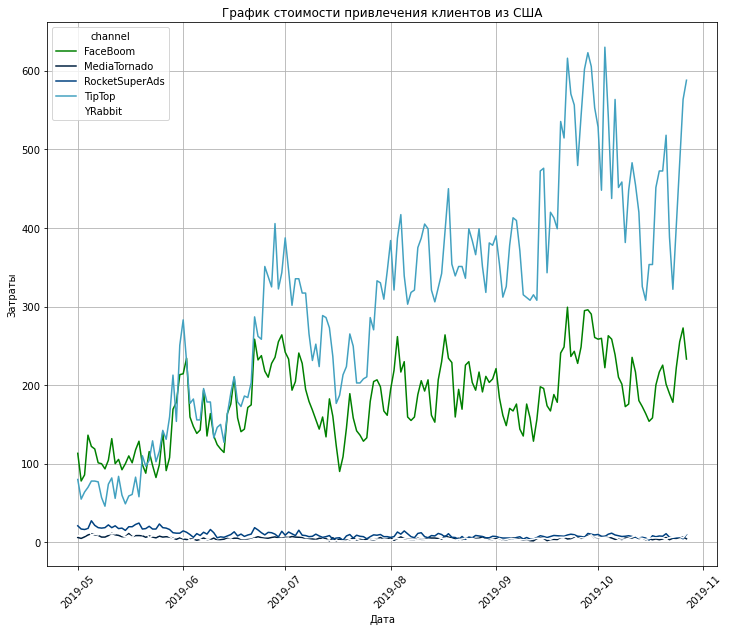

In [60]:
profiles_usa = profiles.query('region == "United States"').pivot_table(
        index='dt', columns='channel', values='acquisition_cost', aggfunc='sum'
    )
profiles_usa.plot(                                             
           figsize=(12, 10), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
           colormap="ocean"
) 

plt.title('График стоимости привлечения клиентов из США')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Вот и нашелся главный сжигатель денег - рекламный канал TipTop, направленный на американсую аудиторию

## Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Средняя накопительная выручка ожидаемо растет. 
Стоимость привлечения пользователей постоянно увеличивается. 
Реклама к концу второй недели не окупается, ROI составляет 80%.
Динамика ROI пользователей к 14 дню падает

Оценена окупаемость рекламы. Рассчитан и визуализирован LTV и ROI. По графикам сделаны следующие выводы:

Реклама не окупается к концу 2й недели. ROI — около 80%.

Рекламный бюджет увеличивается с течением времени.

Окупаемость пользователей падает. 

Пользователи устройств удерживаются примерно одинаково. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

С июня произошел резкий рост стоимости привлечения пользователей из США, при этом окупаемость данных пользователей крайне мала. С середины июня что то пошло не так и окупаемость начала снижаться. Лучше всего окупаются пользователи из Великобритании и Германии. Так как 2/3 пользователей у нас из США - поэтому общая картина кажется печальной

Самый дорогой рекламный канал для привлечения пользователей - TipTop. При этом пользователи с этого канала не окупаются. Также не окупаются пользователи с рекламных каналов AdNonSense и FaceBoom.

В июле хорошо себя показала окупаемость с рекламного канала YRabbit


**Рекомендации для отдела маркетинга** 

Прекратить сливать деньги в рекламный канал TipTop, направленный на американскую аудиторию

Направить внимание по окупаемости следует на владельцев Mac и iPhone - стоимость их привлечения увеличивается от месяца к месяцу, а окупаемоcть оставляет желать лучшего. 


Лучше всего окупается Англия и Германия. Возможно, стоит попробовать закупить больше трафика, целясь на эту аудиторию. 

Не окупаются пользователи, привлеченные из каналов AdNonSense, FaceBoom, TipTop. Больше всего трафика закупали у TipTop, и к октябрю число трат приближалось к 650 у.е. Число трат на FaceBoom находится в районе 300. Остальные каналы привлечения обходятся довольно дешево. Плохо удерживаются пользователи из каналов FaceBoom. Можно попробовать переключить внимание на более дешевые, но прибыльные каналы.

Еще можно попробовать применить рекламу в  социальных сетях - они сейчас являются мощным источником привлечения новых пользователей, имеют большой охват и относительно невысокую стоимость.

Клиенты из FaceBoom, AdNonSense имеют очень плохой процент удержания - думаю следует перенаправить денежные средства на другие каналы
